In [97]:
%matplotlib inline

from google.colab import files, drive    # upload
import numpy as np                       # mathematical calculations
from io import BytesIO                   # reading files
from PIL import Image             # image processing library
import matplotlib.pyplot as plt   # plotting library
import glob                        # find all files in a directory

# Misty Water Effect: Application of Image Stats
Mean, max, min

In [98]:
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [99]:
# Directory for first set of images
DIR = "/content/drive/MyDrive/Colab Notebooks/misty water effect/rapid_5/"

Lean how to use glob to get filenames in directory. 

In [100]:
img_names = glob.glob(DIR+"*.jpg") # Get all filenames that end with .jpg in DIR
img_names = img_names[:4] # Slice so we only use 4 imgs per burst
img_names

['/content/drive/MyDrive/Colab Notebooks/misty water effect/rapid_5/0.jpg',
 '/content/drive/MyDrive/Colab Notebooks/misty water effect/rapid_5/3.jpg',
 '/content/drive/MyDrive/Colab Notebooks/misty water effect/rapid_5/2.jpg',
 '/content/drive/MyDrive/Colab Notebooks/misty water effect/rapid_5/1.jpg']

In [101]:
# Read images into a dict
imgs = {}
agg_imgs = np.zeros((3024, 4032, 3, len(img_names)), dtype=np.uint8)
for i, name in enumerate(img_names):
  img = Image.open(name)
  imgs[i] = np.array(img)
  agg_imgs[:,:,:,i] = imgs[i]

## Greyscale misty water strategy:

1. Per pixel average. For each pixel in image, find the average pixel value over the 4 input images. Set that as the new pixel value in your misty water image. 
2. Per pixel max. For each pixel in image, find the max pixel value over the 4 input images. Set that as the new pixel value in your misty water image. 
2. Per pixel min. For each pixel in image, find the min pixel value over the 4 input images. Set that as the new pixel value in your misty water image. 


In [102]:
# Get dict of greyscale images
def greyscale(rgb_im):
  """
  Given a coloured rgb image, return the greyscale image.
  Input: 
    rgb_im - np array 3d

  Output:
    grey - np array 2d
  """
  return 0.3*rgb_im[:,:,0] + 0.59*rgb_im[:,:,1] + 0.11*rgb_im[:,:,2]

In [103]:
grey_imgs = {}
agg_grey = agg_imgs = np.zeros((3024, 4032, len(img_names)), dtype=np.float32)

for i, im in imgs.items():
  grey_imgs[i] = greyscale(im)
  agg_grey[:,:,i] = grey_imgs[i]

(-0.5, 4031.5, 3023.5, -0.5)

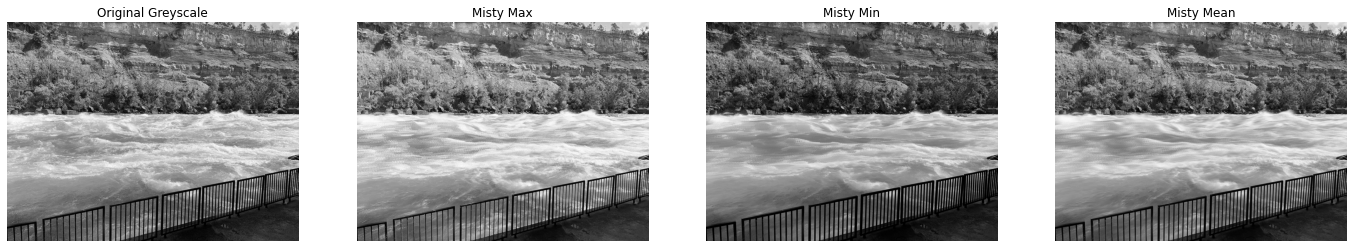

In [104]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[24, 5])
ax1.set_title("Original Greyscale")
ax2.set_title("Misty Max")
ax3.set_title("Misty Min")
ax4.set_title("Misty Mean")

im1 = ax1.imshow(agg_grey[:,:,1], cmap="gray")
im2 = ax2.imshow(agg_grey.max(axis=2), cmap="gray")
im3 = ax3.imshow(agg_grey.min(axis=2), cmap="gray")
im4 = ax4.imshow(agg_grey.mean(axis=2), cmap="gray")

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

## Questions to think about:
1. What is the effect of the number of images on the misty water effect? For example, if I use 10 imgs vs 4 imgs, what do you expect the difference to be?
2. Do you think the misty water effect also blurred out the trees and cliffs in the background? Why or why not?

Homework: Implement Misty water effect, using min and max instead. Plot a 2x2 grid comparing the original image with the mean, max and min misty water effects. 

Misty water strategy:

1. Per pixel average. For each pixel in image, find the average pixel value over the 4 input images. Set that as the new pixel value in your misty water image. 
2. Per pixel max. For each pixel in image, find the max pixel value over the 4 input images. Set that as the new pixel value in your misty water image. 
2. Per pixel min. For each pixel in image, find the min pixel value over the 4 input images. Set that as the new pixel value in your misty water image. 


## Coloured misty water effect

In [105]:
# Read images into a dict
imgs = {}
agg_imgs = np.zeros((3024, 4032, 3, len(img_names)), dtype=np.uint8)
for i, name in enumerate(img_names):
  img = Image.open(name)
  imgs[i] = np.array(img)
  agg_imgs[:,:,:,i] = imgs[i]

In [106]:
def misty_rgb(imgs, mode="max"):
  a,b,c,d = imgs.shape

  # Make a new image -- type uint8
  new = np.zeros((a,b,c), dtype=np.uint8)

  if mode == "max":
    new[:,:,0] = imgs[:,:,0,:].max(axis=2)
    new[:,:,1] = imgs[:,:,1,:].max(axis=2)
    new[:,:,2] = imgs[:,:,2,:].max(axis=2)
  elif mode == "min":
    new[:,:,0] = imgs[:,:,0,:].min(axis=2)
    new[:,:,1] = imgs[:,:,1,:].min(axis=2)
    new[:,:,2] = imgs[:,:,2,:].min(axis=2)
  elif mode == "mean":
    new[:,:,0] = imgs[:,:,0,:].mean(axis=2).astype(np.uint8)
    new[:,:,1] = imgs[:,:,1,:].mean(axis=2).astype(np.uint8)
    new[:,:,2] = imgs[:,:,2,:].mean(axis=2).astype(np.uint8)
  return new

In [107]:
coloured_max = misty_rgb(agg_imgs, mode="max")
coloured_min = misty_rgb(agg_imgs, mode="min")
coloured_mean = misty_rgb(agg_imgs, mode="mean")

(-0.5, 4031.5, 3023.5, -0.5)

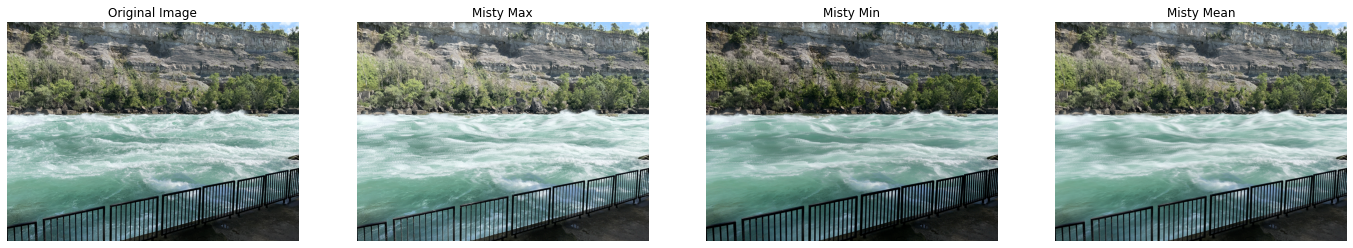

In [108]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[24, 5])
ax1.set_title("Original Image")
ax2.set_title("Misty Max")
ax3.set_title("Misty Min")
ax4.set_title("Misty Mean")

im1 = ax1.imshow(imgs[2])
im2 = ax2.imshow(coloured_max)
im3 = ax3.imshow(coloured_min)
im4 = ax4.imshow(coloured_mean)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

## Faster way to do misty water effect

In [109]:
# Read images into a dict
imgs = {}
for i, name in enumerate(img_names):
  img = Image.open(name)
  imgs[i] = np.array(img)

In [110]:
# Build a 4D matrix of input images
# Step 1: Make an empty 4D matrix of the proper dimensions
a, b, c = imgs[0].shape
stack = np.zeros((a, b, c, len(img_names)), dtype=np.uint8)

# Step 2: Add in images to stack
for i, name in enumerate(img_names):
  img = Image.open(name)
  stack[:,:,:,i] = img

# Step 3: Make a empty 3D matrix for collecting a stack of greyscale images
grey_stack = np.zeros((a, b, len(img_names)), dtype=np.float32)

# Step 4: Add in greyscale images to stack
for i in range(len(img_names)):
  grey_stack[:,:,i] = 0.3*stack[:,:,0,i] + 0.59*stack[:,:,1,i] + 0.11*stack[:,:,2,i]

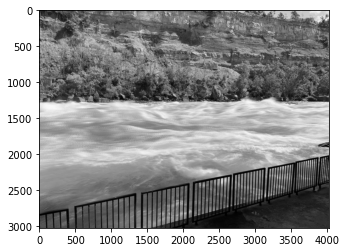

In [111]:
grey_mean = grey_stack.mean(axis=2)
plt.imshow(grey_mean, cmap="gray")
#.max(axis=), .min(axis=)

In [112]:
def misty_rgb(imgs, mode="max"):
  """
  Calculates max, min, mean misty water effect for 
  rgb images, depending on the mode. 

  Input:
    imgs: 4D np array stack of rgb images
    modes: "max", "min", "mean"

  Output:
    3D np array depending on the mode desired
  """

  # Step 1: Figure out the dimensions of the output image
  a, b, c, d = imgs.shape
  # Step 2: Make an empty output image 3D matrix
  out = np.zeros((a, b, c), dtype=np.uint8)

  # Step 3: Implement modes
  if mode == "max":
    out[:,:,0] = imgs[:,:,0,:].max(axis=2)
    out[:,:,1] = imgs[:,:,1,:].max(axis=2)
    out[:,:,2] = imgs[:,:,2,:].max(axis=2)
  elif mode == "min":
    out[:,:,0] = imgs[:,:,0,:].min(axis=2)
    out[:,:,1] = imgs[:,:,1,:].min(axis=2)
    out[:,:,2] = imgs[:,:,2,:].min(axis=2)
  elif mode == "mean":
    out[:,:,0] = imgs[:,:,0,:].mean(axis=2)
    out[:,:,1] = imgs[:,:,1,:].mean(axis=2)
    out[:,:,2] = imgs[:,:,2,:].mean(axis=2)
  else:
    print("Error: %s is not an option" % mode)

  return out